In [1]:
from sklearn.datasets import fetch_openml

from TFG.ANNs import weights

mnist = fetch_openml('mnist_784', version=1, as_frame=False)


In [51]:
X = mnist ["data"] / 255.0 #Scaling
y = mnist ["target"]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [76]:
type (X[0])

numpy.ndarray

In [108]:
import numpy as np
y = [ np.int32(y[i]) for i in range(len(y))]
type (y)

list

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
type (y_test)

list

In [114]:
## Validating set
X_train2, y_train2 = X_train [5000:], y_train [5000:]
X_val, y_val = X_train[:5000], y_train[:5000]
type (y_val)

list

In [190]:
## Importamos las librerías que vamos a usar
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input
import matplotlib.pyplot as plt


In [191]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [192]:
keras.backend.clear_session()

In [193]:
X_train, X_val = X_train_full[5000:] / 255.0, X_train_full[:5000] / 255.0
y_train, y_val = y_train_full [5000:] , y_train_full [:5000]
y_train [0]

7

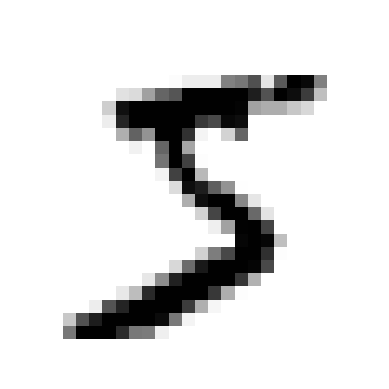

In [194]:
imagen = X_test [0].reshape(28,28)
plt.imshow (X_train_full[0], cmap = "binary")
plt.axis ("off")
plt.show ()

In [196]:
## Construimos nuestra red neuronal

model = Sequential ([
    Input (shape = (28,28)),
    keras.layers.Flatten (),
    Dense (300, activation = "relu"),
    Dense (100, activation = "relu"),
    Dense (10, activation = "softmax")
])

In [197]:
model.summary ()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [198]:
## Compilamos el modelo
model.compile (loss = "sparse_categorical_crossentropy",
               optimizer = "sgd",
               metrics = ["accuracy"])

In [199]:
## Entrenamiento
history = model.fit (X_train, y_train, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8453 - loss: 0.6005 - val_accuracy: 0.9150 - val_loss: 0.3075
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9174 - loss: 0.2929 - val_accuracy: 0.9292 - val_loss: 0.2426
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9310 - loss: 0.2414 - val_accuracy: 0.9430 - val_loss: 0.2076
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9407 - loss: 0.2072 - val_accuracy: 0.9482 - val_loss: 0.1840
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9488 - loss: 0.1804 - val_accuracy: 0.9562 - val_loss: 0.1613
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9541 - loss: 0.1594 - val_accuracy: 0.9578 - val_loss: 0.1494
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9594 - loss: 0.1425 - val_accuracy: 0.9634 - val_loss: 0.1341
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9640 - loss: 0.1284 - 

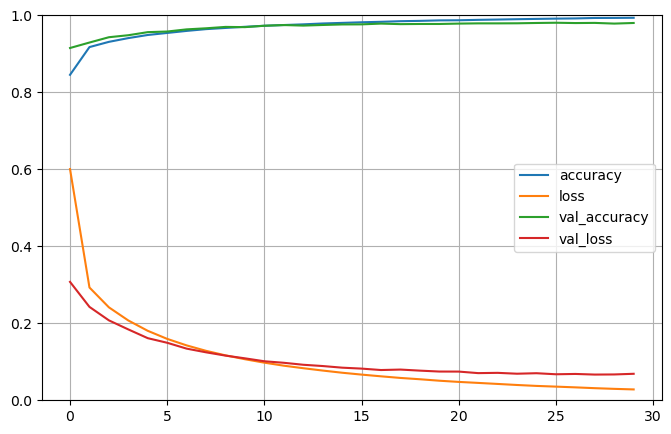

In [200]:
import pandas as pd
pd.DataFrame (history.history).plot (figsize = (8, 5))
plt.grid (True)
plt.gca().set_ylim (0,1)
plt.show ()

In [209]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.84533,0.60053,0.91500,0.30754
1,0.91740,0.29292,0.92920,0.24255
2,0.93098,0.24140,0.94300,0.20757
3,0.94073,0.20723,0.94820,0.18401
4,0.94882,0.18039,0.95620,0.16130
5,0.95409,0.15945,0.95780,0.14935
6,0.95942,0.14254,0.96340,0.13414
7,0.96402,0.12842,0.96620,0.12456
8,0.96711,0.11666,0.96980,0.11604
9,0.97007,0.10660,0.96920,0.10895


In [203]:
X_predic = X_test[:3]
y_pred = model.predict (X_predic)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [208]:
y_test [0:3]

array([7, 2, 1], dtype=uint8)